Ссылка на материалы:  [пдф тут](https://drive.google.com/file/d/16Cm2tgrpuDH8eIdxdSYyOsfDPqnJ3byd/view?usp=sharing)

ФИО:

In [ ]:
Денисов Роман Николаевич

## Задание 1. HTTP-запросы, ответы и погода

Описание:

Напишите HTTP-запрос для получения информации о погоде в введенном городе из API.

Можно использовать API: https://open-meteo.com/. Используйте метод GET.


Ввод
```
56.50, 60.35
```

Вывод
```
Сегодня (1.11) погода 20 ◦С, нет осадков, туман
```





In [ ]:
import requests
from datetime import datetime


def send_request(url):
  response = requests.get(url)

  if response.status_code == 200:

    return response.json( )


def clear_data(data):
  current_date = datetime.today( ).date( )
  current_date = f'{current_date.day}.{current_date.month}'

  temperature = data['current']['temperature_2m']
  temperature_format = data['current_units']['temperature_2m']

  weather_code = data['current']['weather_code']

  if weather_code in [1, 2]:
    weather = 'нет осадков, ясно'
  elif weather_code == 45:
    weather = 'нет осадков, туман'
  else:
    weather = 'выгляни в окно и посмотри сам'

  message = f'Сегодня ({current_date}) погода {temperature}{temperature_format}, {weather}'

  return message


def main(params):
    url = f'https://api.open-meteo.com/v1/forecast?latitude={params[0]}&longitude={params[1]}&current=temperature_2m,weather_code&timezone=Europe%2FMoscow&forecast_days=1'
    data = send_request(url)
    message = clear_data(data)
    print(message)


params = input("Введите координаты: ").split(", ")

main(params)

Введите координаты: 56.50, 60.35
Сегодня (5.11) погода -3.0°C, выгляни в окно и посмотри сам


## Задание 2. HTTP-запросы, ответы и покемоны

**Описание:**


Создайте код программы, которая будет взаимодействовать с API, со следующим функионалом:

1. Используя метод GET, отправьте запрос на endpoint /pokemon, чтобы получить список первых 20 покемонов

2. Извлеките имена покемонов из ответа и выведите их списком

3. Введите с помощью input() название одного из покемонов


```
Имя покемона: clefairy
```



4. Отправьте GET-запрос, чтобы получить полную информацию о выбранном покемоне

5. Извлеките и выведите следующие данные о введенном покемоне:

     • Имя

     • Тип

     • Вес

     • Рост

     • Способности

Используйте PokéAPI (https://pokeapi.co/), который предоставляет информацию о покемонах, их характеристиках, типах и другую информацию.

In [ ]:
import requests


def send_requests(url):
  response = requests.get(url)

  if response.status_code == 200:

    return response.json()


def poc_name(url):
  print("Имена покемонов: ")

  pokemons = []

  for pokemon in send_requests(url)['results'][:20]:
    pokemons.append(pokemon['name'])

  return pokemons


def poc_abilities(name):
  data = send_requests(f'https://pokeapi.co/api/v2/pokemon/{name}')
  name = data['name']
  weight = data['weight']
  height = data['height']
  tipe = data['types'][0]['type']['name']
  message1 = f'{name} - Тип: {tipe}. Вес: {weight}. Рост: {height}.'
  abilities = []

  for i in data['abilities']:
    abilities.append(i['ability']['name'])

  message2 = 'Способности:', *abilities

  return [message1, message2]


def main( ):
  url = 'https://pokeapi.co/api/v2/pokemon-species/'

  print(*poc_name(url), sep= "\n")

  name = input("Введите имя покемона: ")

  print(poc_abilities(name)[0],*poc_abilities(name)[1])


main( )

Имена покемонов: 
bulbasaur
ivysaur
venusaur
charmander
charmeleon
charizard
squirtle
wartortle
blastoise
caterpie
metapod
butterfree
weedle
kakuna
beedrill
pidgey
pidgeotto
pidgeot
rattata
raticate
Введите имя покемона: weedle
weedle - Тип: bug. Вес: 32. Рост: 3. Способности: shield-dust run-away


## Задание 3. HTTP-запросы, ответы и посты

**Описание:**

Создайте программу, которая будет взаимодействовать с JSONPlaceholder API, реализуя следующие функции:

1. Реализуйте функцию, которая выполняет GET-запрос к https://jsonplaceholder.typicode.com/posts и возвращает список постов в формате JSON

2. Реализуйте функцию, котороая получает вводимое ID поста, выполняет GET-запрос по ID и возвращает данные поста в формате JSON

3. Реализуйте функцию, которая выполняет обработку JSON из пункта 2 и выводит всю важную информацию в консоль

In [ ]:
import requests as req


def send_req(url):
  response = req.get(url)

  if response.status_code == 200:

    return response.json( )


def post_info(data, id):
  title = data[id - 1]['title']
  body = data[id - 1]['body']
  all_info = [title, body]

  return all_info


url = 'https://jsonplaceholder.typicode.com/posts'
data = send_req(url)
id = int(input("Введите id поста: "))

print( )
print(post_info(data, id)[0], post_info(data, id)[1], sep= '\n')

Введите id поста: 92

ratione ex tenetur perferendis
aut et excepturi dicta laudantium sint rerum nihil
laudantium et at
a neque minima officia et similique libero et
commodi voluptate qui


## Задание 4. HTTP-запросы, ответы и работа с постами

**Описание**

Создайте программу, которая будет взаимодействовать с JSONPlaceholder API (из предыдущего задания), реализуя новые функции:

1. Реализуйте функцию, которая принимает заголовок, содержимое и ID пользователя (информация вводится с помощью input()), выполняет POST-запрос для создания нового поста и возвращает информацию о созданном посте в формате JSON


```
Заголовок: Новый пост
Содержимое поста: Тут должно находиться содержимое нового поста...
ID пользователя: 10
```



2. Реализуйте функцию, которая принимает ID поста, новый заголовок и новое содержимое, выполняет PUT-запрос и возвращает обновлённый пост в формате JSON

3. Реализуйте функцию, которая принимает ID поста, выполняет DELETE-запрос и возвращает статус-код ответа

In [ ]:
import requests


def response(url):
  response = requests.get(url)

  if response.status_code == 200:

    return response.json( )


def addendum(url):
  user_id = int(input("Введите id пользователя: "))
  title = input("Введите заголовок: ")
  body = input("Введите основную информацию: ")
  addendum = {
      'userId': user_id,
      'title': title,
      'body': body
  }
  response = requests.post(url, json=addendum)

  if response.status_code == 201:
    res = response.json( )

    print( )
    print("Введённый пост:")
    print( )
    print("Заголовок:", res['title'])
    print("Содержимое поста:", res['body'])
    print("ID пользователя:", res['userId'])

  else:
    print("Программа выдала ошибку")


def replacement(url):
  id = int(input("Введите id поста: "))
  title = input("Введите заголовок: ")
  body = input("Введите основную информацию: ")
  updated_post = {
      'id': id,
      'title': title,
      'body': body
  }
  res = requests.put(f'{url}/{id}', json = updated_post)
  json_post = response(f'{url}/{id}')

  if res.status_code == 200:
    print( )
    print("Список успешно обновлён")
    print( )

    update_post = {'userId': json_post['userId'],
                   'id': json_post['id'],
                   'title': updated_post['title'],
                   'body': updated_post['body']
                   }

    return update_post


def delete_post(url):
  id = int(input("Введите id поста: "))

  print( )

  res = requests.get(f'{url}/{id}')

  if res.status_code == 200:
    delete = requests.delete(f'{url}/{id}')

    return f'Программа вывела такой статус-код: {delete.status_code}'


url = 'https://jsonplaceholder.typicode.com/posts'
command = None

while command != 0:
  print( )
  print("Добавить пост - 1")
  print("Изменить пост по id - 2")
  print("Удалить пост по id - 3")
  print("Остановить программу - 0")
  print( )

  command = int(input("Введите цифру: "))

  print( )

  if command == 1:
    addendum(url)
  if command == 2:
    print(replacement(url))
  if command == 3:
    print(delete_post(url))


Добавить пост - 1
Изменить пост по id - 2
Удалить пост по id - 3
Остановить программу - 0

Введите цифру: 1

Введите id пользователя: 23
Введите заголовок: dfs
Введите основную информацию: sdff sff

Введённый пост:

Заголовок: dfs
Содержимое поста: sdff sff
ID пользователя: 23

Добавить пост - 1
Изменить пост по id - 2
Удалить пост по id - 3
Остановить программу - 0

Введите цифру: 2

Введите id поста: 23
Введите заголовок: sdf
Введите основную информацию: sdf

Список успешно обновлён

{'userId': 3, 'id': 23, 'title': 'sdf', 'body': 'sdf'}

Добавить пост - 1
Изменить пост по id - 2
Удалить пост по id - 3
Остановить программу - 0

Введите цифру: 3

Введите id поста: 56

Программа вывела такой статус-код: 200

Добавить пост - 1
Изменить пост по id - 2
Удалить пост по id - 3
Остановить программу - 0

Введите цифру: 3

Введите id поста: 101

None

Добавить пост - 1
Изменить пост по id - 2
Удалить пост по id - 3
Остановить программу - 0

Введите цифру: 3

Введите id поста: 100

Программа в

## Задание 5. HTTP-запросы, ответы и пёсики

**Описание**

Создайте программу, которая будет взаимодействовать с Dog API, которая позволит получать список пород собак, вводить несколько пород и получать их фотогрфии.

Этапы:

1. Создайте функцию, которая использует метод GET и возвращает список всех пород собак в формате нумерованного списка

2. Реализуйте возможность ввода нескольких пород собак через запятую


```
african, chow, dingo
```



3. Создание функции, которая реализует запрос, возвращает и выводит изображениия собак, породы которых были введены до этого


Используйте Dog API (https://dog.ceo/dog-api/), который предоставляет информацию о породах собак и их изображения.


*Подсказка*



```
import requests
from PIL import Image
from IPython.display import display
import io

url = <____>
response = <____>
        
if response.<______> == <___>:
      image_url = response.json()['message']

res = requests.<__>(image_url)
img = Image.open(io.BytesIO(res.content))
display(img)
```



Породы собак: 
1. affenpinscher
2. african
3. airedale
4. akita
5. appenzeller
6. australian
7. bakharwal
8. basenji
9. beagle
10. bluetick
11. borzoi
12. bouvier
13. boxer
14. brabancon
15. briard
16. buhund
17. bulldog
18. bullterrier
19. cattledog
20. cavapoo
21. chihuahua
22. chippiparai
23. chow
24. clumber
25. cockapoo
26. collie
27. coonhound
28. corgi
29. cotondetulear
30. dachshund
31. dalmatian
32. dane
33. danish
34. deerhound
35. dhole
36. dingo
37. doberman
38. elkhound
39. entlebucher
40. eskimo
41. finnish
42. frise
43. gaddi
44. germanshepherd
45. greyhound
46. groenendael
47. havanese
48. hound
49. husky
50. keeshond
51. kelpie
52. kombai
53. komondor
54. kuvasz
55. labradoodle
56. labrador
57. leonberg
58. lhasa
59. malamute
60. malinois
61. maltese
62. mastiff
63. mexicanhairless
64. mix
65. mountain
66. mudhol
67. newfoundland
68. otterhound
69. ovcharka
70. papillon
71. pariah
72. pekinese
73. pembroke
74. pinscher
75. pitbull
76. pointer
77. pomeranian
78. poodle


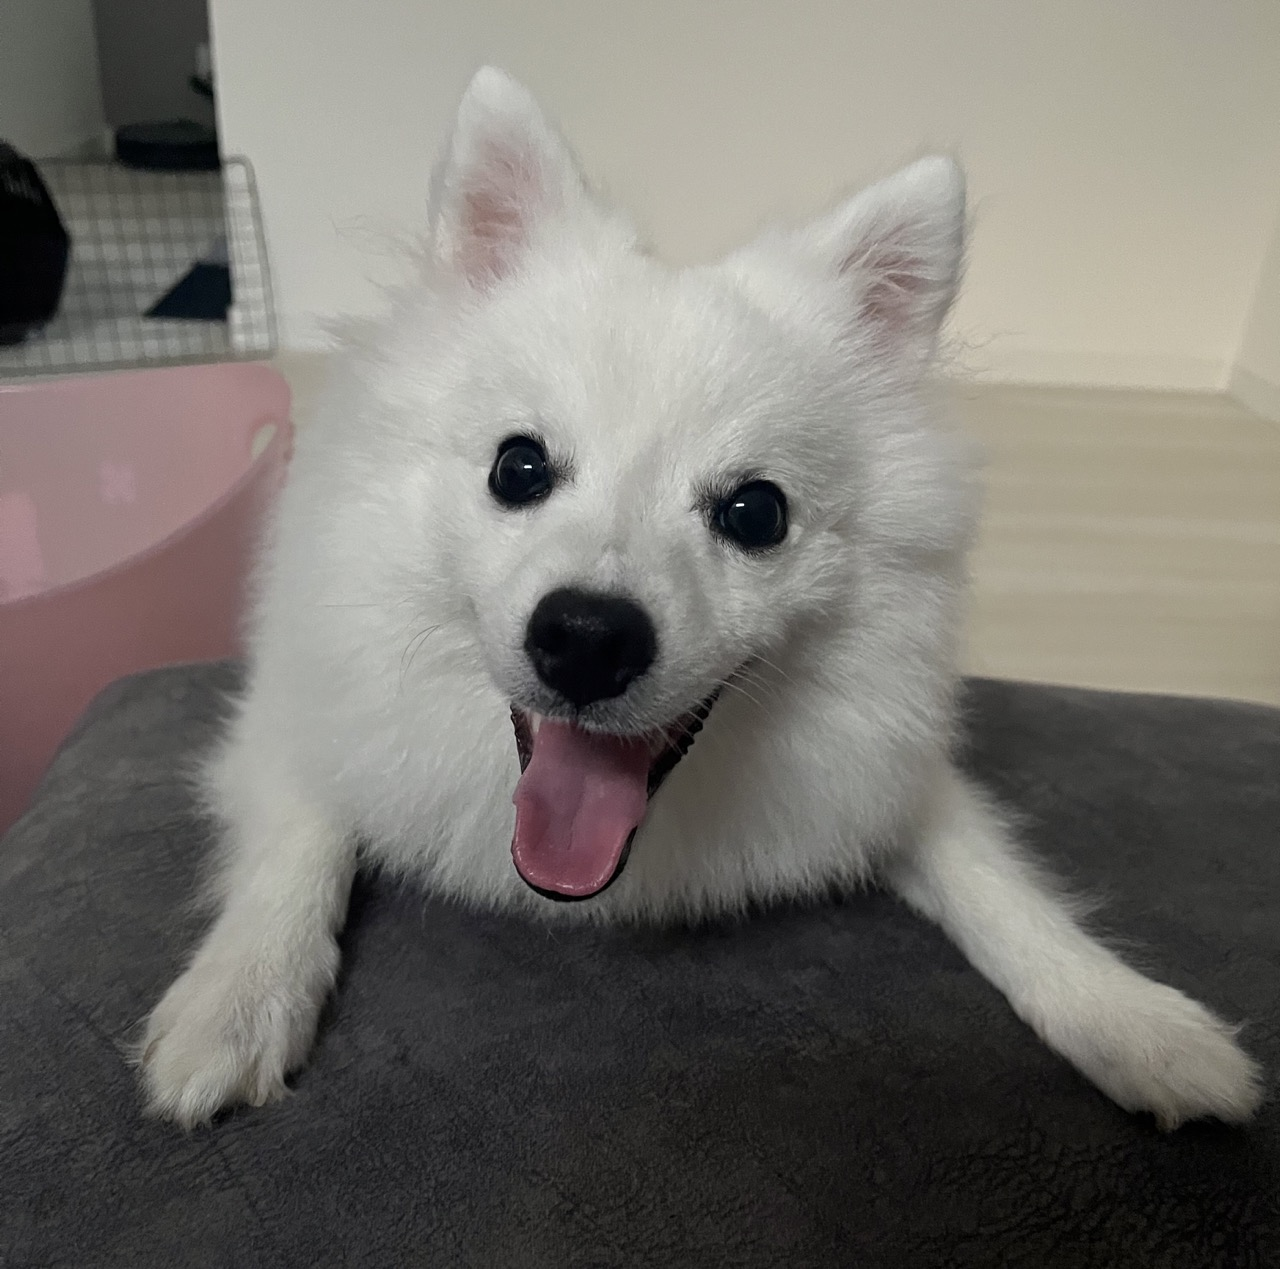

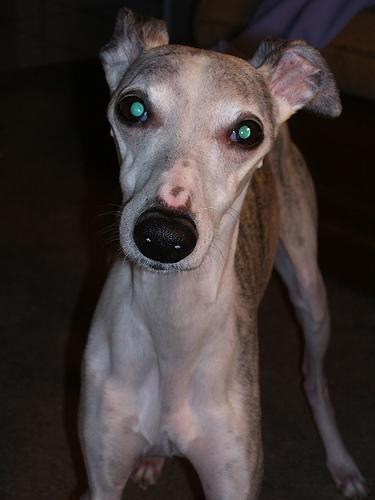

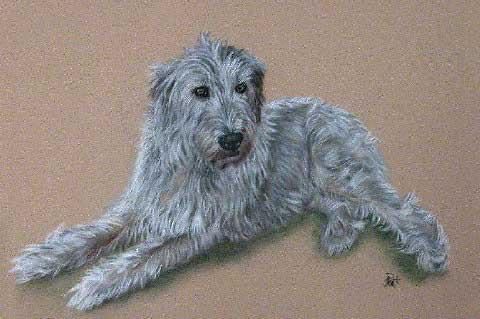

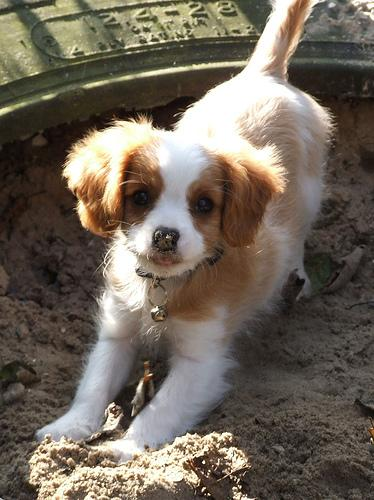

In [ ]:
import requests
from PIL import Image
from IPython.display import display
import io


def breeds_list(breeds_url):
  response = requests.get(breeds_url)

  if response.status_code == 200:
    res = response.json( )
    num = 0

    print("Породы собак: ")

    for breeds in res["message"].keys( ):
      num += 1

      print(f'{num}. {breeds}')


def entry_breeds( ):
  breeds = input("Введите породы собак через запятую: ").split(", ")

  return breeds


def image_breeds( ):
  entry_breeds_list = entry_breeds( )

  for num_image in entry_breeds_list:
    image_breed = f'https://dog.ceo/api/breed/{num_image}/images/random'
    res = requests.get(image_breed)
    img_url_json = res.json( )
    img_response = requests.get(img_url_json['message'])
    img = Image.open(io.BytesIO(img_response.content))

    display(img)


breeds_url = "https://dog.ceo/api/breeds/list/all"

breeds_list(breeds_url)
image_breeds( )